<a href="https://colab.research.google.com/github/LukaszBijak/Studies_PJP/blob/main/Kopia_notatnika_Zespoly_klasyfikatorow_(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Zespoły klasyfikatorów
----

In [ ]:
!git clone https://github.com/matzim95/ML-datasets


fatal: destination path 'ML-datasets' already exists and is not an empty directory.


In [ ]:
import pandas as pd

def load_dataset(filename, class_column, index_col=None):
    dataset = pd.read_csv(f'ML-datasets/{filename}.csv', index_col=index_col)
    dataset['class'] = dataset[class_column].astype('category').cat.codes
    classes = dataset.pop(class_column).unique()
    return dataset, classes

def prepare_dataset(dataset_name):
    params = {'iris': {'class_column': 'species', 'index_col': None},
              'wine': {'class_column': 'Class', 'index_col': None},
              'glass': {'class_column': 'Type', 'index_col': 'ID'}}
    dataset, classes = load_dataset(dataset_name,
                                    **params[dataset_name])
    y = dataset.pop('class')
    X = dataset
    return X, y, classes

In [ ]:
X, y, classes = prepare_dataset('glass')

Bagging
---

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import Normalizer, StandardScaler


In [ ]:
normalizer = Normalizer()
standarizer = StandardScaler()
preprocessor = standarizer

## Testy na zbiorach danych

In [ ]:

def preprocess_data(X, preprocessor=None):
    if preprocessor is not None:
        preprocessor.fit(X)
        X_preprocessed = X.copy()
        X_preprocessed[:] = preprocessor.transform(X.values)
        X = X_preprocessed
    return X

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# average:
#   None - wyniki dla każdej klasy osobno
#   'binary' - dla wybranej w `pos_label` etykiety
#   'micro' - dla całkowitej liczby TP, FN, FP
#   'macro' - nieważona średnia dla każdej klasy
#   'weighted' - ważona średnia dla każdej klasy

def calculate_metrics(target, prediction, average='weighted'):
    accuracy = accuracy_score(target, prediction)
    precision = precision_score(target, prediction, average=average)
    recall = recall_score(target, prediction, average=average)
    f1 = f1_score(target, prediction, average=average)
    mislabeled = (target != prediction).sum()
    total = len(target)
    return accuracy, precision, recall, f1, mislabeled, total

def print_results(metrics, classifier_id='classifier'):
    print(f'Results for {classifier_id}')
    print('----')
    print(f'  Accuracy:  {metrics[0]}')
    print(f'  Precision: {metrics[1]}')
    print(f'  Recall:    {metrics[2]}')
    print(f'  F1 score:  {metrics[3]}')
    print(f'  Mislabeled {metrics[4]} out of {metrics[5]}')
    print('\n')
    
def plot_confusion_matrix(confusion_matrix, classes, title=None,
                          title_appendix='',
                          cmap=plt.cm.Blues):
    # tytuł wykresu
    if title_appendix:
        title_appendix = f'({title_appendix})'
    if title is None:
        title = f'Confusion matrix {title_appendix}'
    
    fig, ax = plt.subplots()
    # rysuje CM
    img = ax.imshow(confusion_matrix, cmap=cmap)
    # dodaje pasek z boku
    ax.figure.colorbar(img, ax=ax)
    # dodatki do wykresu
    ax.set_xticks(np.arange(confusion_matrix.shape[1]))
    ax.set_xticklabels(classes, rotation=45, ha='right', rotation_mode='anchor')
    ax.set_yticks(np.arange(confusion_matrix.shape[0]))
    ax.set_yticklabels(classes, rotation=45, ha='right', rotation_mode='anchor')
    ax.set_title(title)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    
    # etykiety
    fmt = '.2f' if confusion_matrix.dtype == 'float' else 'd'
    thresh = confusion_matrix.max() / 2
    for y, row in enumerate(confusion_matrix):
        for x, cell in enumerate(row):
            ax.text(x, y, format(cell, fmt),
                    ha='center', va='center',
                    color='white' if cell > thresh else 'black')
    fig.tight_layout()
    
    return ax

def normalize_confusion_matrix(confusion_matrix):
    return confusion_matrix.astype(
        'float') / confusion_matrix.sum(
        axis=1)[np.newaxis].T

In [ ]:
X = preprocess_data(X, standarizer)
X.head()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron
ID,,,,,,,,,
1,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
2,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
3,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
4,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
5,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
svm = SVC(C=100, gamma = 0.01)
svm.fit(X_train, y_train)
y_svm_predict = svm.predict(X_test)

Results for SVM
----
  Accuracy:  0.7441860465116279
  Precision: 0.7131782945736433
  Recall:    0.7441860465116279
  F1 score:  0.7268644747393745
  Mislabeled 11 out of 43




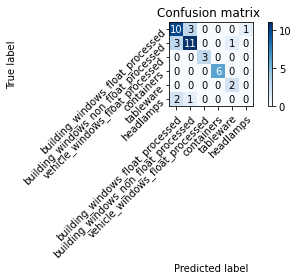

In [ ]:
print_results(calculate_metrics(y_test.values, y_svm_predict), 'SVM')
cm = confusion_matrix(y_test, y_svm_predict)
plot_confusion_matrix(cm, classes)

In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(svm, X, y, cv=10,  scoring = 'f1_weighted')

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  UserWarning,


In [ ]:
cv_results['test_score']

array([0.62307692, 0.6462704 , 0.73737374, 0.77005348, 0.56429845,
       0.53852814, 0.73015873, 0.75198413, 0.55952381, 0.60275689])

In [ ]:
bclf = BaggingClassifier(base_estimator = LogisticRegression(), n_estimators = 50)
bclf.fit(X_train, y_train)
y_b = bclf.predict(X_test)

Results for Bagging Ensemble
----
  Accuracy:  0.6744186046511628
  Precision: 0.6395348837209303
  Recall:    0.6744186046511628
  F1 score:  0.6524458700882116
  Mislabeled 14 out of 43




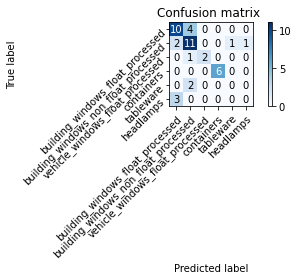

In [ ]:
print_results(calculate_metrics(y_test.values, y_b), 'Bagging Ensemble')
cm = confusion_matrix(y_test, y_b)
plot_confusion_matrix(cm, classes)

In [ ]:
print(bclf.estimators_)

[LogisticRegression(random_state=970785355), LogisticRegression(random_state=659573833), LogisticRegression(random_state=1268013136), LogisticRegression(random_state=1720831162), LogisticRegression(random_state=287137610), LogisticRegression(random_state=167467990), LogisticRegression(random_state=761996537), LogisticRegression(random_state=564798012), LogisticRegression(random_state=633609346), LogisticRegression(random_state=1234943072), LogisticRegression(random_state=465468780), LogisticRegression(random_state=1297152767), LogisticRegression(random_state=1743006028), LogisticRegression(random_state=1682823453), LogisticRegression(random_state=467805120), LogisticRegression(random_state=1453088676), LogisticRegression(random_state=297884717), LogisticRegression(random_state=1607498567), LogisticRegression(random_state=367949233), LogisticRegression(random_state=405354323), LogisticRegression(random_state=1964049261), LogisticRegression(random_state=993506004), LogisticRegression(ran

In [ ]:
cv_results = cross_validate(bclf, X, y, cv=10,  scoring = 'f1_weighted')
cv_results['test_score']

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  UserWarning,


array([0.58585859, 0.45790514, 0.59458556, 0.75378788, 0.35124717,
       0.59447779, 0.68253968, 0.43673469, 0.54166667, 0.75070028])

In [ ]:
np.average(cv_results['test_score'])

0.665370405349397

Random Forest
----

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier(n_estimators=500, max_depth =8)

rfclf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=500)

In [ ]:
y_r = rfclf.predict(X_test)

In [ ]:
print(rfclf.estimators_)

[DecisionTreeClassifier(max_depth=8, max_features='auto',
                       random_state=1974606002), DecisionTreeClassifier(max_depth=8, max_features='auto', random_state=234485106), DecisionTreeClassifier(max_depth=8, max_features='auto',
                       random_state=1266602660), DecisionTreeClassifier(max_depth=8, max_features='auto', random_state=931026683), DecisionTreeClassifier(max_depth=8, max_features='auto',
                       random_state=1122273017), DecisionTreeClassifier(max_depth=8, max_features='auto',
                       random_state=1429205564), DecisionTreeClassifier(max_depth=8, max_features='auto', random_state=400335573), DecisionTreeClassifier(max_depth=8, max_features='auto', random_state=978131218), DecisionTreeClassifier(max_depth=8, max_features='auto', random_state=488341207), DecisionTreeClassifier(max_depth=8, max_features='auto', random_state=943376016), DecisionTreeClassifier(max_depth=8, max_features='auto', random_state=783631769), D

Results for RF Ensemble
----
  Accuracy:  0.7674418604651163
  Precision: 0.7825482011528523
  Recall:    0.7674418604651163
  F1 score:  0.757890365448505
  Mislabeled 10 out of 43




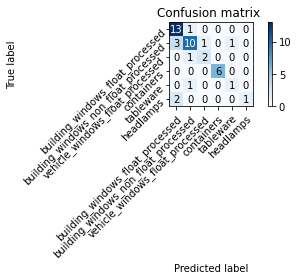

In [ ]:
print_results(calculate_metrics(y_test.values, y_r), 'RF Ensemble')
cm = confusion_matrix(y_test, y_r)
plot_confusion_matrix(cm, classes)

In [ ]:

randomforest_results =cross_validate(rfclf,  X, y, cv=8, scoring='f1_weighted')
randomforest_results['test_score']

array([0.67480029, 0.84701191, 0.63274854, 0.67941935, 0.88916736,
       0.73470819, 0.72789666, 0.73870574])

In [ ]:
np.average(randomforest_results['test_score'])

0.7405572558221805

Zad.2.
Na zbiorze glass spróbuj osiagnać lepszy efekt niż f1_score (cross_validation)= 74% wykonujac randomforest i bagging_classifier (bagging musi bazowac albo na regresji logistycznej albo na svm), dobór parametrów i algorytmu (w przypadku baggingu) dokonaj z pomocą grid_search_cv. Podaj który algorytm osiągnał lepszy rezultat

In [ ]:
new_rf_model = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[10, 50, 100, 200, 300, 400, 500],
              'max_depth' : [6,8, 10, 25, 50],
              'criterion': ['gini', 'entropy']}
searcher = GridSearchCV(new_rf_model, parameters)
searcher.fit(X_train, y_train)
pred = searcher.predict(X_test)
pred_train = searcher.predict(X_train)
#accuracy_test
print(accuracy_score(y_test, pred))
#Accuracy_train
print(accuracy_score(y_train, pred_train))

0.7674418604651163
1.0


In [ ]:
print("Best CV params", searcher.best_params_)

Best CV params {'max_depth': 8, 'n_estimators': 500}


In [ ]:
 from sklearn.model_selection import cross_validate

cv_results = cross_validate(searcher, X, y, cv=5, scoring = 'f1_weighted')
print(cv_results['test_score'])
np.average(cv_results['test_score'])

[0.7071987  0.66456257 0.62084839 0.64392493 0.74583392]


0.6764737017380216

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier


bc_params = {"base_estimator__kernel": ['rbf','poly', 'sigmoid', 'linear'],
          "base_estimator__C": [10,100,1000,0.1, 0.01, 0.000001],
          "base_estimator__gamma": [0.01, 10, 100],
          'max_features': [0.5, 0.7, 1.0],
          'max_samples': [0.5, 0.7, 1.0],
          'n_estimators': [2, 5, 10, 20, 50, 100],
}
bc_searcher = GridSearchCV(BaggingClassifier(base_estimator=SVC()), bc_params)
bc_searcher.fit(X_train, y_train)
pred = bc_searcher.predict(X_test)
pred_train = bc_searcher.predict(X_train)
#accuracy_test
print(accuracy_score(y_test, pred))
#Accuracy_train
print(accuracy_score(y_train, pred_train))

In [ ]:
print("Best CV params", bc_searcher.best_params_)

AttributeError: ignored